# NOTE

# IMPORTS

In [1]:
from keras import models
from keras import layers
from scipy.io import loadmat
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras import backend as K
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


# MNIST DATASET

In [2]:
# Load dataset
dataset_path = 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/mnist/mnist'
flower = 'C:/Users/Tajr/Downloads/datasplits.mat'
dataset = loadmat(flower)
dataset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Tue May 23 14:09:12 2006',
 '__version__': '1.0',
 '__globals__': [],
 'trn1': array([[  24,   31,    8,   21,   25,   15,   27,   30,   39,   26,    2,
           29,   22,   16,   19,   36,   10,   33,    7,   35,   64,   71,
           48,   61,   65,   55,   67,   70,   79,   66,   42,   69,   62,
           56,   59,   76,   50,   73,   47,   75,  104,  111,   88,  101,
          105,   95,  107,  110,  119,  106,   82,  109,  102,   96,   99,
          116,   90,  113,   87,  115,  144,  151,  128,  141,  145,  135,
          147,  150,  159,  146,  122,  149,  142,  136,  139,  156,  130,
          153,  127,  155,  184,  191,  168,  181,  185,  175,  187,  190,
          199,  186,  162,  189,  182,  176,  179,  196,  170,  193,  167,
          195,  224,  231,  208,  221,  225,  215,  227,  230,  239,  226,
          202,  229,  222,  216,  219,  236,  210,  233,  207,  235,  264,
          271,  248,  261,  2

## Data

In [3]:
data = dataset['data']
data = data.T

# Normalize data
data = data.astype('float') / 255.0
data.shape
data.shape

KeyError: 'data'

In [4]:
data = data.reshape(data.shape[0], 28, 28, 1)
data.shape

(70000, 28, 28, 1)

## Labels

In [5]:
labels = dataset['label']
labels = labels.T

# Label Binarization
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels.shape

(70000, 10)

## Data Split

In [6]:
(train_samples, testX, train_labels, testY) = train_test_split(data, labels, test_size=0.25)
(trainX, validationX, trainY, validationY) = train_test_split(train_samples, train_labels, test_size=0.33333)
print(trainX.shape)
print(validationX.shape)
print(testX.shape)

(35000, 28, 28, 1)
(17500, 28, 28, 1)
(17500, 28, 28, 1)


# ARCHITECTURE

In [7]:
width = 28
height = 28
depth = 1
classes = 10
conv_strides = (5, 5)
pool_strides = (2, 2)
pool_size = (2, 2)
input_filters = 20
input_shape = (width, height, depth)

# Configure input shape
if K.image_data_format() == 'channels_first':
    input_shape = (depth, width, height)

# Build a model
model = models.Sequential()
model.add(layers.Conv2D(input_filters, conv_strides, padding='same', input_shape=input_shape))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=pool_size, strides=pool_strides))
model.add(layers.Conv2D(50,conv_strides, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=pool_size, strides=pool_strides))
model.add(layers.Flatten())
model.add(layers.Dense(500))
model.add(layers.Activation('relu'))
model.add(layers.Dense(classes))
model.add(layers.Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)             

# COMPILE AND TRAIN

In [8]:
opt = SGD(lr=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(validationX, validationY))

Train on 35000 samples, validate on 17500 samples
Epoch 1/100
35000/35000 [==============================] - 26s 748us/step - loss: 0.5529 - acc: 0.8431 - val_loss: 0.1818 - val_acc: 0.9459
Epoch 2/100
35000/35000 [==============================] - 27s 764us/step - loss: 0.1475 - acc: 0.9558 - val_loss: 0.1212 - val_acc: 0.9644
Epoch 3/100
35000/35000 [==============================] - 22s 621us/step - loss: 0.1014 - acc: 0.9689 - val_loss: 0.1028 - val_acc: 0.9673
Epoch 4/100
35000/35000 [==============================] - 21s 599us/step - loss: 0.0790 - acc: 0.9758 - val_loss: 0.0781 - val_acc: 0.9745
Epoch 5/100
35000/35000 [==============================] - 18s 504us/step - loss: 0.0657 - acc: 0.9797 - val_loss: 0.0824 - val_acc: 0.9745
Epoch 6/100
35000/35000 [==============================] - 18s 501us/step - loss: 0.0559 - acc: 0.9830 - val_loss: 0.0642 - val_acc: 0.9802
Epoch 7/100
35000/35000 [==============================] - 22s 630us/step - loss: 0.0485 - acc: 0.9854 - val_l

# PLOT TRAIN RESULT

## Data Points

In [9]:
history_dict = history.history
epochs = np.arange(0, 100)

accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.style.use('ggplot')

## Accuracy

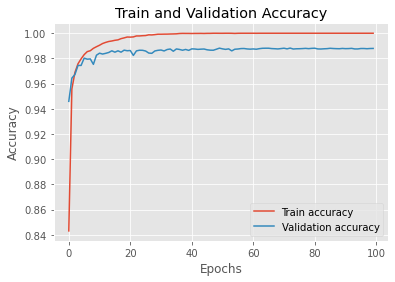

In [10]:
plt.plot(epochs, accuracy, label='Train accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title("Train and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss

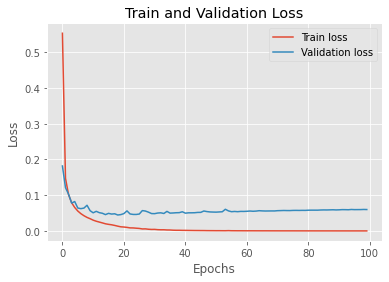

In [11]:
plt.clf()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# EVALUATE

In [15]:
# The first entry is our loss and the last entry in a list is our network accuracy on new data 
result = model.evaluate(testX, testY)
result

17500/17500 [==============================] - 3s 195us/step


[0.05975236966203998, 0.9886857271194458]

# PREDICTIONS

In [20]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1770
         1.0       0.99      0.99      0.99      1947
         2.0       0.99      0.99      0.99      1780
         3.0       0.99      0.98      0.98      1787
         4.0       0.99      0.99      0.99      1785
         5.0       0.99      0.98      0.98      1515
         6.0       0.99      0.99      0.99      1714
         7.0       0.98      0.99      0.99      1798
         8.0       0.98      0.98      0.98      1709
         9.0       0.99      0.98      0.98      1695

    accuracy                           0.99     17500
   macro avg       0.99      0.99      0.99     17500
weighted avg       0.99      0.99      0.99     17500



# CONCLUSION